# Solutions to Applications of Python Practice Problems

In [5]:
import numpy as np
import matplotlib.pyplot as plt

### \(1\) Orthonormal Basis Vectors

###### <span style='font-size:medium'>The following problem is intended to give you practice using numpy arrays and writing functions. You will write a function that finds the dot product between two vectors. After getting this practice, we will see how we can simplify the problem by using existing functions in the numpy library. </span>



##### \(1\) Verify that the vectors  $v_1$ = \[3, \-1, 0\] and $v_2$ = \[1, 3, \-8/7\] are orthogonal by writing a function that finds their dot product.



##### \(2\) Write a function that normalizes $v_1$ and $v_2$ and print the normalized vectors.



In [2]:
# Part 1

# Define a function that takes in two vectors (labeled a and b) as arguments (inputs).

def dot(a,b):  # define a function that takes in a and b as arguments (which we will assume are arrays when we call them in the function)
    total = 0                 # initialize a running total that we will add the element-wise products to
    for i in range((len(a))): # loop over the number of elements in a and b (they must be equal)
        total += a[i] * b[i]  # multiply the elements of the vectors together and add them to the running sum
    return total              # returns the sum of the products

# Use numpy.array to create our 2 vectors (if you forget the syntax you can always google it!)

v1 = np.array([3,-1,0])
v2 = np.array([1,3,-8/7])

# Assign a new variable that stores the return value of our function evaluating our dot product

d = dot(v1, v2)

# Print our dot product (what value do we expect to get?)

print("Dot product:\n", d)      # the \n part makes it so it prints d on a new line, which looks much nicer

# Instead of writing a function (which is excellent practice!), we
# can simplify our code to one line by using the numpy.dot function

nd = np.dot(v1, v2)
print("Numpy dot product:\n", nd)

Dot product:
 0.0
Numpy dot product:
 0.0


In [3]:
# Part 2
      
# Define a function that takes in a vector "a" as the argument. Notice how you can use the same variables as in the function above because "a" is a local variable (the rest of the code does not know about "a" outside of the function).

# Write a function that takes in an arbitrary vector and returns it in normalized form

def normalized(a):
    sum_of_squares = 0                          # initialize a running sum that sums the squares of the vector elements
    for i in range(len(a)):                     # loop over all of the elements of vector a
        sum_of_squares += a[i]**2               # add the squares of the vector elements to the running sum
    length = np.sqrt(sum_of_squares)            # get the length of the vector by taking the square root of the sum (try using "np.sqrt()"!)
    return a/length                             # return the vector a divided by it's norm (length)

# Print the normalized vectors v1 and v2

print("Normalized v1:\n", normalized(v1))
print("Normalized v2:\n", normalized(v2))

# Use the np.linalg.norm function to verify that our vectors are normalized (have length of 1)

print("Length of v1:\n", np.linalg.norm(normalized(v1)))
print("Length of v2:\n", np.linalg.norm(normalized(v2)))

Normalized v1:
 [ 0.9486833  -0.31622777  0.        ]
Normalized v2:
 [ 0.2974015   0.89220451 -0.33988743]
Length of v1:
 0.9999999999999999
Length of v2:
 1.0


### \(2\) Solving for an eigensystem in Python

##### <span style='font-size:medium'>In the Linear Algebra 3: Matrix Algebra section, we cover an example of finding the eigenvectors and eigenvalues of a 3x3 matrix by solving the characteristic equation. This requires finding the roots of a cubic polynomial. As you can imagine, extending this approach to higher matrix dimensions becomes impractical by hand, which is why we make computers do the work for us! For this problem, we will build a 7x7 matrix and find its eigenvectors/values using the numpy linalg library. This type of problem will show up countless times in CHEM221A\-\-you will often be asked to build a Hamiltonian matrix in a certain basis and subsequently find its stationary states \(eigenvectors\) and corresponding energy levels.</span>

##### ​



In [4]:
import numpy as np

##### \(1\) Generate a random symmetric 7x7 matrix with elements between 0\-1. There are a lot of ways to do this but for this case we can just generate a random matrix and then overwrite the lower triangular matrix to make it symmetric.



##### \(2\) Prove that the vector v = \[ 3, \-3, 7 \] is an eigenvector of the matrix

```
   A = [ 5,  2, 0 ]
       [ 2,  5, 0 ]
       [-3,  4, 6 ]
```

##### By writing your own function that performs matrix\-vector multiplication! What is the corresponding eigenvalue?



In [6]:
# Part 1

O = np.random.rand(7,7)

for i in range(len(O)):                                     # Loop over the number of rows of the matrix
    for j in range(i+1, len(O)):                            # Loop over the appropriate number of columns (Be careful here, it's tricky!)
        O[j,i] = O[i,j]                                   # Overwrite the appropriate elements of O to get the new symmetric matrix

print("Matrix O that we will diagonalize:\n", O)

# Find the eigenvalues and eigenvectors of this matrix using numpy.linalg.eig and print the result.

evals, evecs = np.linalg.eig(O)    # np.linalg.eig returns the eigenvalues and eigenvectors of your matrix. **Read the documentation to figure out                                          # how to properly call this function

print("Eigenvalues of O:\n", evals)
print("Eigenvectors of O:\n", evecs)


Matrix O that we will diagonalize:
 [[0.52818978 0.47659799 0.16903867 0.98596298 0.02337051 0.31167813
  0.34891573]
 [0.47659799 0.38353306 0.87341259 0.86874367 0.08531003 0.22331131
  0.31295448]
 [0.16903867 0.87341259 0.97597026 0.55422874 0.13323424 0.66845275
  0.59135517]
 [0.98596298 0.86874367 0.55422874 0.10376842 0.26300479 0.58470635
  0.62792025]
 [0.02337051 0.08531003 0.13323424 0.26300479 0.02427942 0.94830213
  0.20578124]
 [0.31167813 0.22331131 0.66845275 0.58470635 0.94830213 0.88042831
  0.23832746]
 [0.34891573 0.31295448 0.59135517 0.62792025 0.20578124 0.23832746
  0.90634876]]
Eigenvalues of O:
 [ 3.41960148 -0.93159763 -0.69891352 -0.29481186  1.08365683  0.7011619
  0.5234208 ]
Eigenvectors of O:
 [[-0.32778771 -0.35786256  0.27406931  0.42748656  0.29626864  0.63687993
  -0.11506392]
 [-0.38332991 -0.39753931 -0.17863617 -0.64656946  0.27829609 -0.11048646
  -0.39421028]
 [-0.46844469  0.08048536  0.29203918  0.42621785  0.0285843  -0.6661288
  -0.25017695

In [8]:
# Part 2

# Generate your vector and matrix here

A = np.array([[5,2,0],[2,5,0],[-3,4,6]])
v = np.array([3, -3, 7])

print("A matrix:\n", A)
print("Vector v:\n", v)

# Define a function that takes in an arbitary matrix A and vector v and returns the matrix-vector product

def mat_vec_mul(A,v):                           # define function that takes in arbitrary matrix A and vector v as arguments
    b = np.zeros_like(v)                        # create empty np array with same dimensions as vector v
    for i in range(len(v)):                     # loop over length (number of rows) of vector v (remember this must be equal to the # of columns of A!)
        for j in range(len(v)):                 # loop over number of columns of A
            b[i] += A[i][j] * v[j]              # save matrix-vector product to new array
    return b

print("New vector:\n", mat_vec_mul(A,v))



A matrix:
 [[ 5  2  0]
 [ 2  5  0]
 [-3  4  6]]
Vector v:
 [ 3 -3  7]
New vector:
 [ 9 -9 21]


In [ ]:
# Check your answer using the np.matmul function
np.matmul(A, v)

### \(3\) Compute definite integrals using the Trapezoid method and Midpoint method

##### Computing definite integrals is one of the first things you'll encounter in both 221A as well as 220A, when you are required to normalize wavefunctions and probability distributions. While this method is covered in the lectures, we want to go over it again, as it is required for the next question on computing fourier series.




##### \(1\) Write a function trapezoid\_integral\(x,y\) that takes a uniformly distributed array of values \(x\) within the limits of the definite integral and the values of the function at those points \(y\), and returns the definite integral using the trapezoid method. Using this method compute the definite integral of $e^{-x}$ from $0$ to $5$ . You might find this [link](https://math.libretexts.org/Courses/Mount_Royal_University/MATH_2200%3A_Calculus_for_Scientists_II/2%3A_Techniques_of_Integration/2.5%3A_Numerical_Integration_-_Midpoint%2C_Trapezoid%2C_Simpson%27s_rule) to be useful



##### \(2\) Write a function midpoint\_integral\(f,a,b\) that takes a reference to a function \(f\), the lower limit \(a\), and the upper limit \(b\) of the definite integral, and computes the definite integral compute using the midpoint method.  Using this method compute the definite integral of $e^{-x}$ from $0$ to $5$ , and compare the numerical error between the midpoint method and trapezoid method. You might find this [link](https://math.libretexts.org/Courses/Mount_Royal_University/MATH_2200%3A_Calculus_for_Scientists_II/2%3A_Techniques_of_Integration/2.5%3A_Numerical_Integration_-_Midpoint%2C_Trapezoid%2C_Simpson%27s_rule) to be useful.



In [ ]:
import numpy as np

# Part 1

#Write a function that returns exp(-x)
def func(x):
    return np.exp(-x)

#Define the limits of integration
a = 0            #lower limit
b = 5            #upper limit

x = np.linspace(0,5,100) #generate a linespace of 100 uniformly distributed points between a and b
y = func(x)              #compute the value of the function at those points

def trapezoid_integral(x,y):
    Npoints = x.shape[0]             #contains the length of the array x
    integrand = 0                    #holder for the integral
    dx = x[1] - x[0]                 #compute the spacing between each point
    for i in range(Npoints-1):       #loop over all the values
        integrand += 0.5 * (y[i] + y[i+1]) * dx     #sum over all the values
    return integrand

trapz_integral = trapezoid_integral(x,y)         #call the function
exact_integral = 1-np.exp(-5)               #exact integral
trapz_error    = np.abs(exact_integral-trapz_integral)         #compute the numerical error of integration

print("The definite integral of exp(-x) from 0 to 5 computed using the trapezoid method is ", trapz_integral)
print("The numerical error for the trapezoid method is", trapz_error)

The definite integral of exp(-x) from 0 to 5 computed using the trapezoid method is  0.9934731751290443
The numerical error for the trapezoid method is 0.00021112212812979259


In [ ]:
# Part 2

#Write a function that returns exp(-x)
def func(x):
    return np.exp(-x)

#Define the limits of integration
a = 0            #lower limit
b = 5            #upper limit

def midpoint_integral(f,a,b):
    Npoints = 100
    x = np.linspace(a,b,100)                  #generate a linespace of 100 uniformly distributed points between a and b
    dx = x[1] - x[0]                 #compute the spacing between each point
    integrand = 0          #holder for the integral
    for i in range(Npoints-1):           #loop over all values
        xmid = 0.5*(x[i] + x[i+1])           #compute the midpoint between each uniformly distributed point
        ymid = f(xmid)           #compute the value of the functions at xmid
        integrand += dx*ymid     #sum up the value to compute the integral       
    return integrand

midp_integral = midpoint_integral(func,a,b)         #call the function
exact_integral = 1-np.exp(-5)               #exact integral
midp_error    = np.abs(midp_integral - exact_integral)         #compute the numerical error of integration

print("The definite integral of exp(-x) from 0 to 5 computed using the trapezoid method is ", midp_integral)
print("The numerical error for the trapezoid method is", midp_error)

The definite integral of exp(-x) from 0 to 5 computed using the trapezoid method is  0.9931564953024992
The numerical error for the trapezoid method is 0.00010555769841535945


### BONUS: \(4\) Compute the fourier series using numerical integration

##### PLEASE FINISH Q. 3\(1\) BEFORE ATTEMPTING THIS PROBLEM.

##### In this section, we are going to write a function to compute the coefficients as well the fourier series of a couple of functions using the trapezoid\_integral function that we just constructed.



##### \(1\) To start, construct a function fourier\_coefficients\(x,y,N\), that takes in a array with uniformly distributed linespace between a given range \(x\), the values of the function at those points \(y\), and the order of expansion for the fourier series that is given by $2N+1$ . It returns the coefficients for the sine and cosine functions by computing the relevant definite integral using the trapezoid\_integral method.



##### \(2\) Next, write a function fourier\_series\(x,coeffs,N\) that computes the fourier series expansion upto order $2N+1$ for all values of x , by taking the fourier coefficients as the argument.



##### \(3\) Plot the fourier series of for the following functions within the range of \[ $-\pi, \pi$ \] :

##### \(a\) $f_1=-x$

##### \(b\) $f_2 = sin(x + \frac{1}{2}sin(x))$

##### \(c\)$f_3 = \mathrm{sign}(x)$ \(=1 for $ \geq $ 0, else = \-1\)

##### Do so for N = \[1,2,10,25,50\] , and compare the differences between the approximations. Why can expansions of certain functions be truncated at lower values of N?



In [37]:
#Part 1
#Write a to compute the fourier coefficients
def fourier_coeffs(x,y,N):
    Npoints = x.shape[0]              #Contains the length of the array x
    coeffs = np.zeros((2*N+1))                #Holder for all the coefficients
    coeffs[0] = trapezoid_integral(x,y)/2            #Compute the 0th coefficient using numerical integration
    for i in range(N):
        tmp_cos = np.cos((i+1)*x)*y                #Compute the integrand for the (i+1)th cosine term
        tmp_sin = np.sin((i+1)*x)*y               #Compute the integrand for the (i+1)th sin term
        coeffs[2*i+1] = trapezoid_integral(x,tmp_cos)/np.pi    #Compute the coefficient corresponding to the (i+1)th cosine term
        coeffs[2*i+2] = trapezoid_integral(x,tmp_sin)/np.pi    #Compute the coefficient corresponding to the (i+1)th sine term
    return coeffs

In [38]:
#Part 2
def fourier_series(x,coeffs,N):
    Npoints  = x.shape[0]              #Contains the length of the array x
    fourier  = 0              #Holder for the values of the fourier series
    fourier += coeffs[0]              #Add the 0th coeffient
    for i in range(N):
        fourier += coeffs[2*i+1]*np.cos((i+1)*x)          #Add the (i+1)th cosine term
        fourier += coeffs[2*i+2]*np.sin((i+1)*x)          #Add the (i+1)th sine term
    return fourier




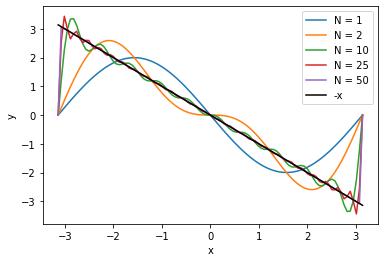

In [39]:
#Returns the function f1
def f1(x):
    return -x

N = np.array([1,2,10,25,50])        #All the values of the order of expansion for the fourier series

a = -np.pi                          #Lower limit of the fourier series
b = np.pi                           #Upper limit of the fourier series
Npoints = 100

x = np.linspace(a,b,100)            #generate a linespace of 100 uniformly distributed points between a and b
y1= f1(x)                           #compute the value of f1 at all points in x

fourier1 = np.zeros((N.shape[0],Npoints))    #initialize an 2D array that stores the fourier expansion of f1 for different order of expansion
for i in range(N.shape[0]):                  #Loop over all values of N
    tmp_coeff = fourier_coeffs(x,y1,N[i])            #Compute the coefficients for fourier expansion
    fourier1[i]= fourier_series(x,tmp_coeff,N[i])    #Compute the fourier series

#Plot the expansion
plt.figure()
for i in range(N.shape[0]):
    plt.plot(x,fourier1[i],label='N = {:d}'.format(N[i]))

#Plot the original function
plt.plot(x,y1,'k',label='-x')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

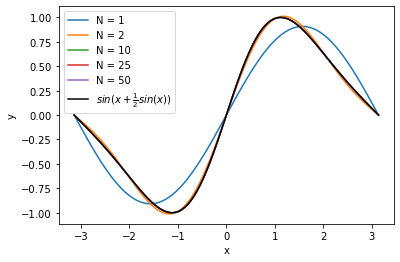

In [40]:
#Part 3
import matplotlib.pyplot as plt

#Returns the function f1
def f2(x):
    return np.sin(x + 0.5 * np.sin(x))

N = np.array([1,2,10,25,50])        #All the values of the order of expansion for the fourier series

a = -np.pi                          #Lower limit of the fourier series
b = np.pi                           #Upper limit of the fourier series
Npoints = 100

x = np.linspace(a,b,100)            #generate a linespace of 100 uniformly distributed points between a and b
y2= f2(x)                           #compute the value of f1 at all points in x

fourier2 = np.zeros((N.shape[0],Npoints))           #initialize an 2D array that stores the fourier expansion of f1 for different order of expansion
for i in range(N.shape[0]):             #Loop over all values of N
    tmp_coeff = fourier_coeffs(x,y2,N[i])      #Compute the coefficients for fourier expansion
    fourier2[i]= fourier_series(x,tmp_coeff,N[i])    #Compute the fourier series

#Plot the expansion
plt.figure()
#Plot the original function

for i in range(N.shape[0]):
    plt.plot(x,fourier2[i],label='N = {:d}'.format(N[i]))
plt.plot(x,y2,'k',label='$sin(x + \\frac{1}{2} sin(x))$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()


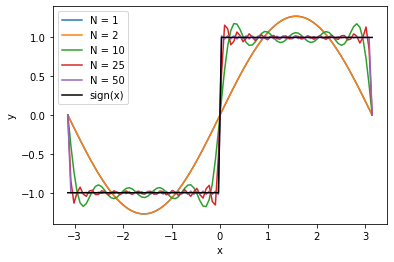

In [41]:
#Returns the function f1
def f3(x):
    return 2*((x >= 0).astype(float)) - 1

N = np.array([1,2,10,25,50])        #All the values of the order of expansion for the fourier series

a = -np.pi                          #Lower limit of the fourier series
b = np.pi                           #Upper limit of the fourier series
Npoints = 100

x = np.linspace(a,b,100)            #generate a linespace of 100 uniformly distributed points between a and b
y3= f3(x)                           #compute the value of f1 at all points in x

fourier3 = np.zeros((N.shape[0],Npoints))    #initialize an 2D array that stores the fourier expansion of f1 for different order of expansion
for i in range(N.shape[0]):                  #Loop over all values of N
    tmp_coeff = fourier_coeffs(x,y3,N[i])            #Compute the coefficients for fourier expansion
    fourier3[i]= fourier_series(x,tmp_coeff,N[i])    #Compute the fourier series

#Plot the expansion
plt.figure()
for i in range(N.shape[0]):
    plt.plot(x,fourier3[i],label='N = {:d}'.format(N[i]))

#Plot the original function
plt.plot(x,y3,'k',label='sign(x)')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()